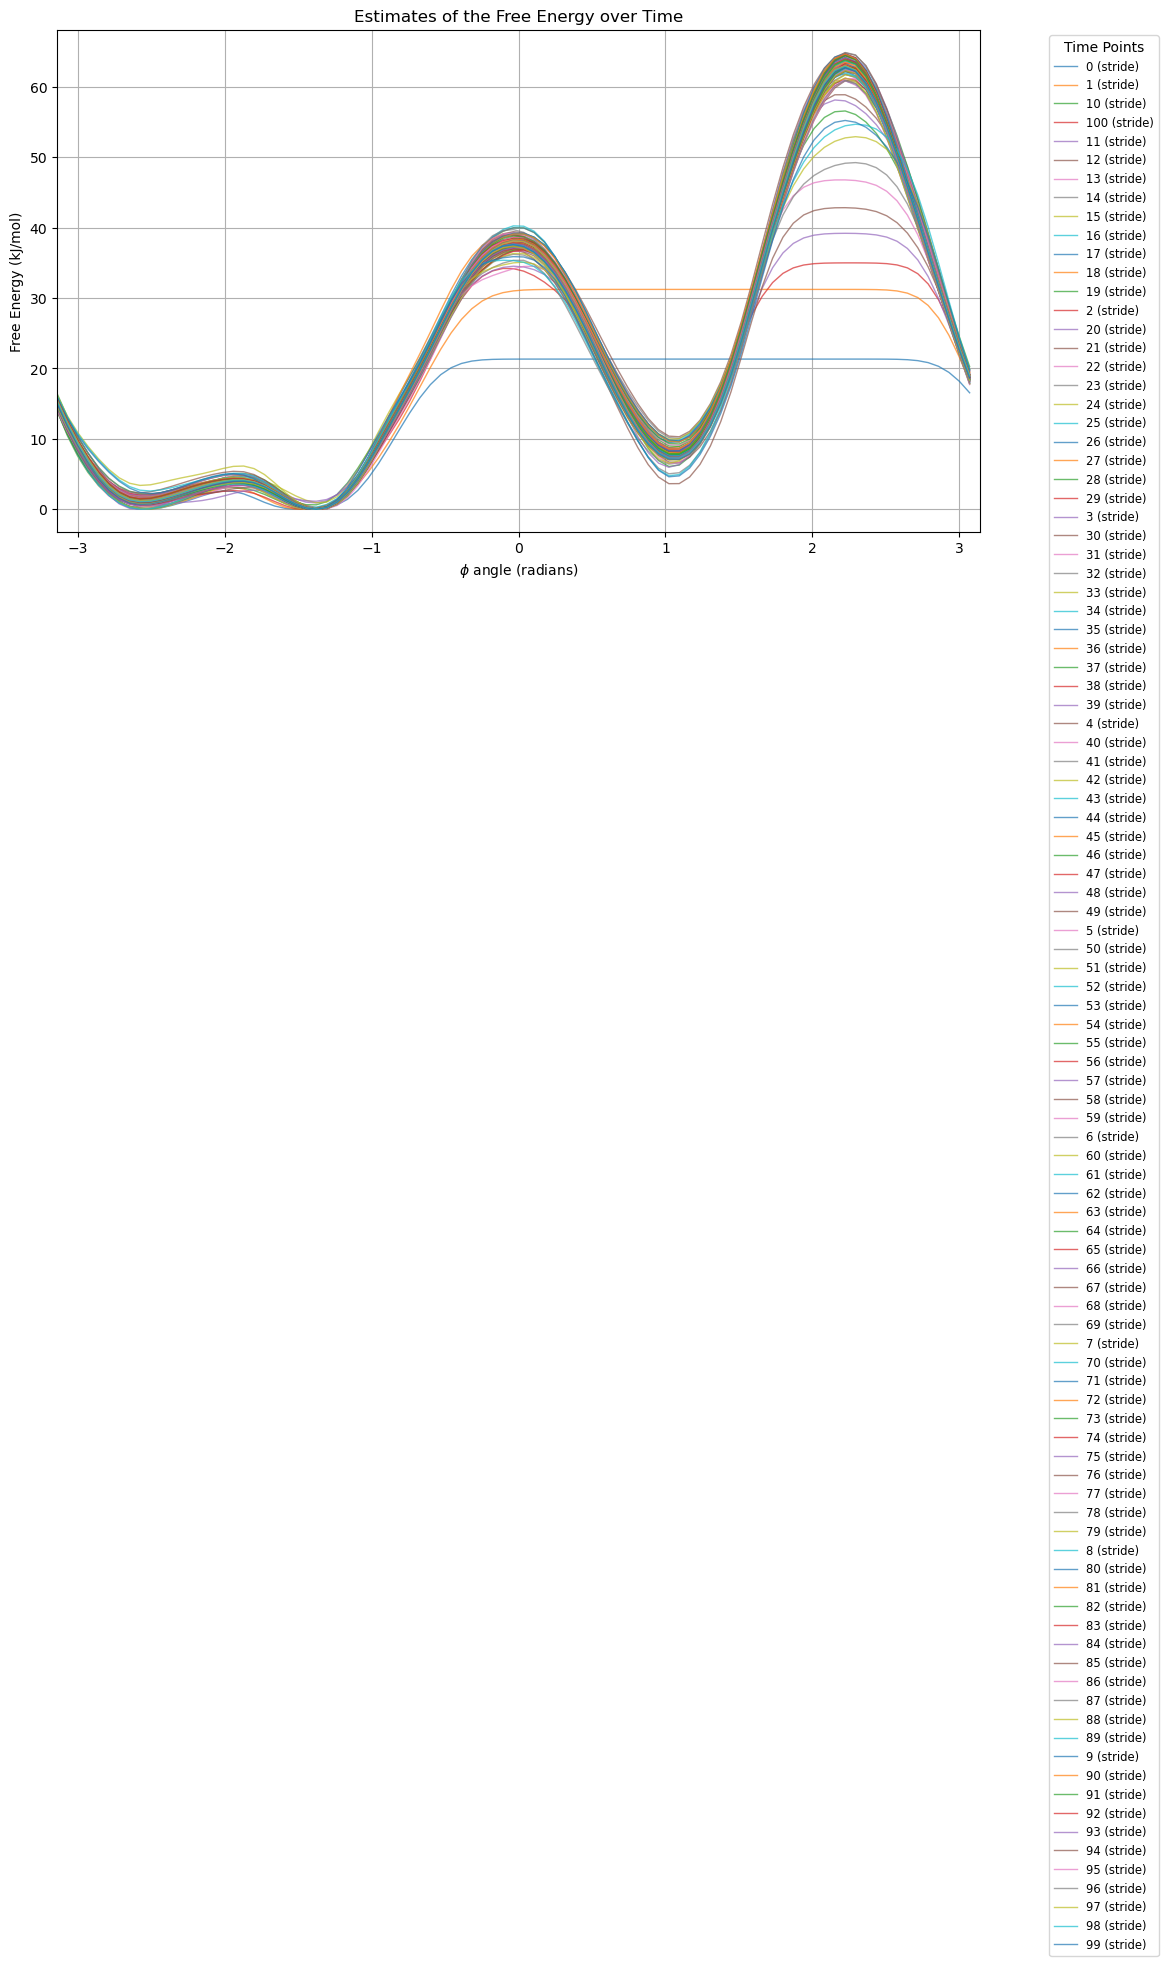

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

# 文件路径模式，用于匹配所有的 fes_X.dat 文件
file_pattern = "fes_*.dat"
files = sorted(glob.glob(file_pattern))

# 检查是否找到任何文件
if not files:
    print("No FES files found. Please check the file path or pattern.")
    exit()

# 创建一个图像
plt.figure(figsize=(10, 6))

# 遍历所有的 fes_X.dat 文件，并绘制自由能曲线
for file_path in files:
    try:
        # 读取数据，跳过注释行，并指定列名
        data = pd.read_csv(
            file_path,
            delim_whitespace=True,
            comment='#',
            names=["phi", "free_energy", "der_phi"]
        )
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        continue

    # 提取时间信息用于图例（从文件名中提取索引部分）
    time_index = file_path.split("_")[-1].replace(".dat", "")

    # 绘制自由能曲线
    plt.plot(data["phi"], data["free_energy"], label=f'{time_index} (stride)', linewidth=1, alpha=0.7)

# 设置图像标签和标题
plt.xlabel(r'$\phi$ angle (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Estimates of the Free Energy over Time')
plt.grid(True)
plt.tight_layout()
plt.xlim(-np.pi, np.pi)  # 设置 x 轴范围为 -pi 到 pi
plt.legend(title='Time Points', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize='small')
plt.savefig('dihedral_phi_calculated_every_100_Gaussian_kernelsdeposited')
plt.show()
